In [2]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

from matplotlib.lines import Line2D

from collections import Counter

np.random.seed(0)

In [6]:
cycle1 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_1-Clean.csv")
cycle1 = cycle1.drop(columns=["Feed","Water"])

cycle2 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_2-Clean.csv")
cycle2 = cycle2.drop(columns=["Feed","Water"])

In [7]:
cycle1=cycle1.rename(columns={"Date of Laid": "Date"})
cycle1.Date = pd.to_datetime(cycle1.Date, format = '%m/%d/%Y')

cycle2=cycle2.rename(columns={"Date of Laid": "Date"})
cycle2.Date = pd.to_datetime(cycle2.Date, format = '%m/%d/%Y')

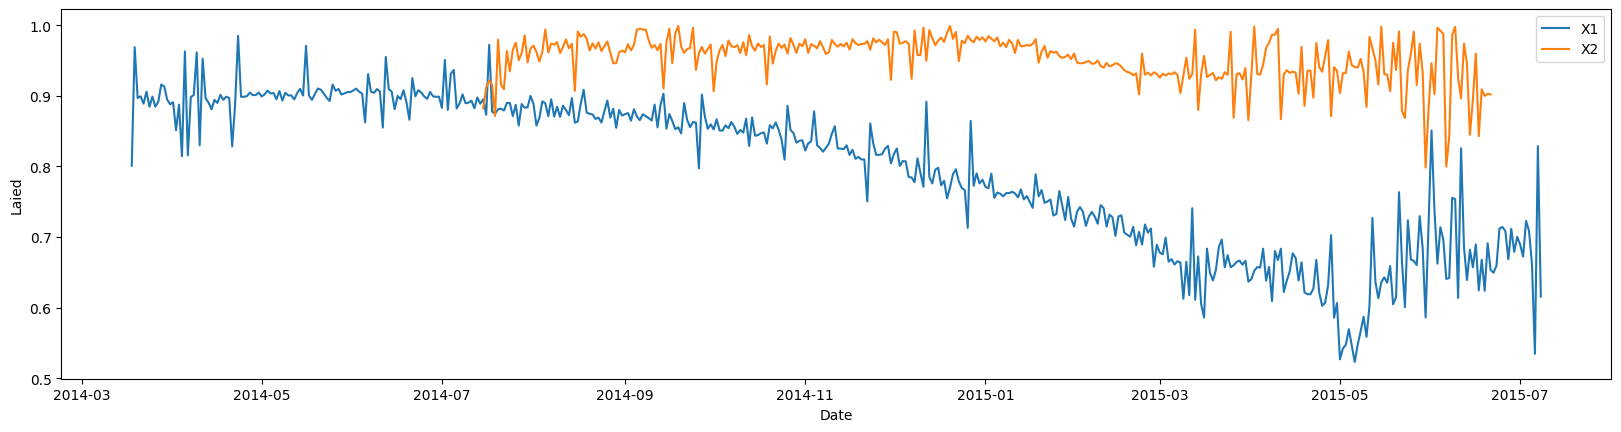

In [8]:
fig, ax1 = plt.subplots()
plt.ylabel("Laied")
plt.xlabel("Date")
fig.set_figwidth(20)
ax1.plot(cycle1.Date, cycle1["Laied"], label='X1')
ax1.plot(cycle2.Date, cycle2["Laied"], label='X2')
ax1.legend()
plt.show()

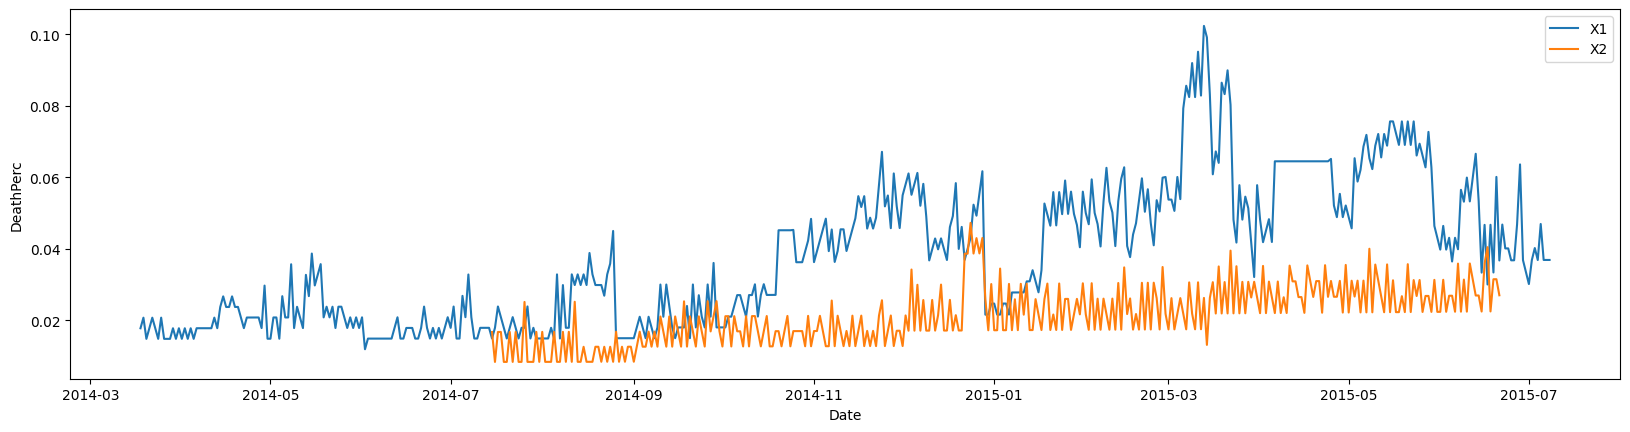

In [10]:
fig, ax1 = plt.subplots()
plt.ylabel("DeathPerc")
plt.xlabel("Date")
fig.set_figwidth(20)
ax1.plot(cycle1.Date, cycle1["DeathPerc"]*100, label='X1')
ax1.plot(cycle2.Date, cycle2["DeathPerc"]*100, label='X2')
ax1.legend()
plt.show()

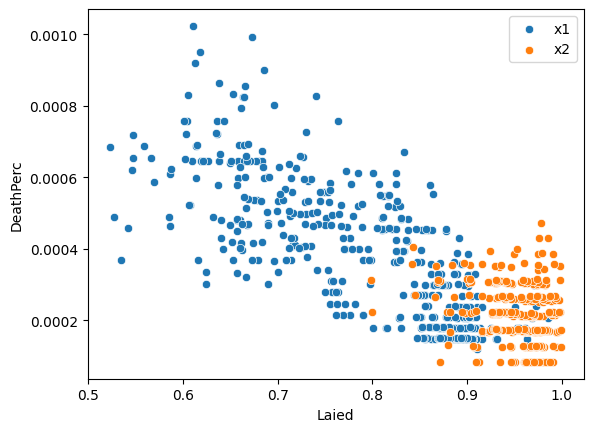

In [11]:
sns.scatterplot(data = cycle1, x = cycle1["Laied"], y= cycle1["DeathPerc"], label="x1")
sns.scatterplot(data = cycle2, x = cycle2["Laied"], y= cycle2["DeathPerc"], label="x2")
plt.legend()

c:\Users\canal\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\canal\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


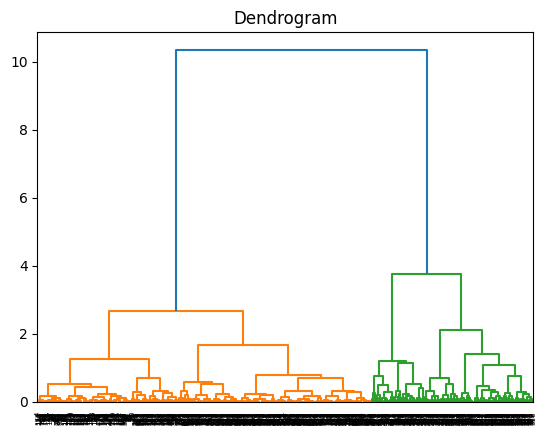

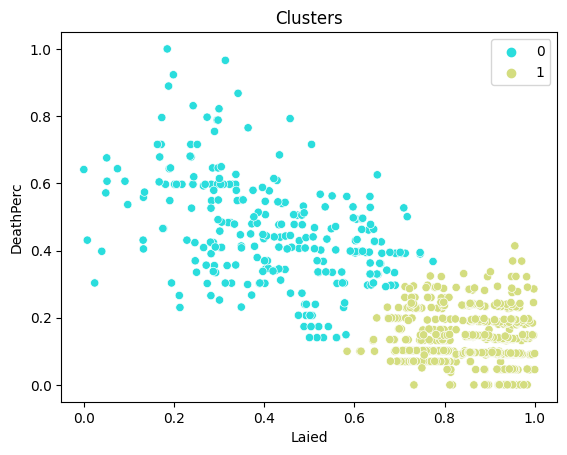

In [13]:
cycleTot = pd.concat([cycle1, cycle2], axis=0, ignore_index=True)
cycleTot=cycleTot.rename(columns={"Date": "Date of Laid"})

label = ut.HierarchicalClutering(cycleTot, ["Laied", "DeathPerc"])

In [14]:
cycle2.describe()

,Death,Chickens,DeathPerc,Eggs,Laied,Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality),AvgTemp,MinTemp,MaxTemp,AvgHum,MinHum,MaxHum
count,342.000000,342.000000,342.000000,342.000000,342.000000,0.0,0.0,0.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,4.926901,23170.377193,0.000214,22101.751462,0.953572,NaN,NaN,NaN,13.759942,8.938889,19.355556,76.040351,51.718129,96.049123
std,1.775668,500.978943,0.000080,1041.608968,0.032321,NaN,NaN,NaN,7.452753,6.957300,8.316606,15.005897,19.147689,8.193080
min,2.000000,22217.000000,0.000084,17850.000000,0.798479,NaN,NaN,NaN,-2.300000,-5.300000,0.400000,24.600000,11.300000,46.800000
25%,4.000000,22751.750000,0.000169,21352.500000,0.934006,NaN,NaN,NaN,7.500000,3.000000,12.600000,66.725000,38.600000,95.850000
50%,5.000000,23216.000000,0.000213,22430.000000,0.962506,NaN,NaN,NaN,14.450000,9.550000,20.150000,76.750000,47.900000,99.900000
75%,6.000000,23615.750000,0.000265,22890.000000,0.975350,NaN,NaN,NaN,20.000000,14.950000,26.200000,87.400000,62.775000,99.900000
max,11.000000,23898.000000,0.000473,23700.000000,0.999240,NaN,NaN,NaN,28.000000,21.300000,35.400000,99.900000,99.900000,100.000000


In [15]:
label_cycle1 = label[:478]
label_cycle2 = label[478:]

In [16]:
label_group = Counter(label)

In [17]:
cmap = mpl.colormaps['rainbow']
keys = list(label_group.keys())

colors = []

num = len(label_group.keys())+1
step = 1.0/num

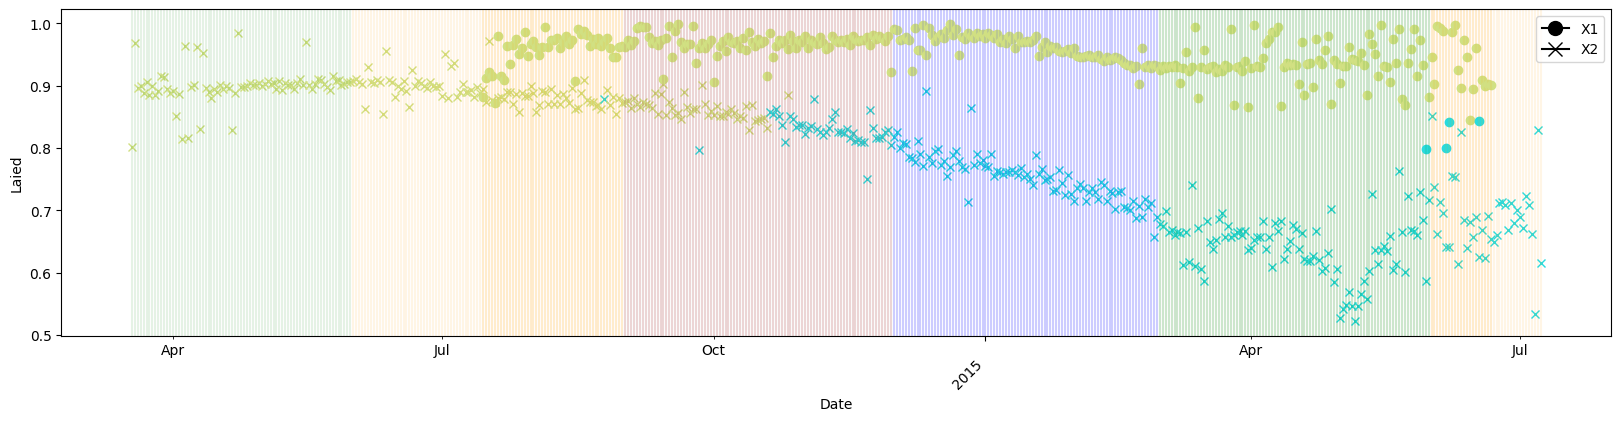

In [23]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel("Laied")

ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%Y"))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
fig.set_figwidth(20)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

for i in range(len(label_cycle1)):

    if label_cycle1[i] == 0:
        color = cmap(0.33)
    else:
        color = cmap(0.66)
    
    ax1.plot(cycle1["Date"][i],cycle1["Laied"][i],"x", color=color)

    month =  cycle1.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycle1["Date"][i], color=color,alpha=0.1)

for i in range(len(label_cycle2)):

    if label_cycle2[i] == 0:
        color = cmap(0.33)
    else:
        color = cmap(0.66)
    
    ax1.plot(cycle2["Date"][i],cycle2["Laied"][i],"o", color=color)

    month =  cycle2.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycle2["Date"][i], color=color,alpha=0.1)

legend_elements = [Line2D([0], [0], marker='o', color='black', label='X1', markersize=10),
                Line2D([0], [0], marker='x', color='black', label='X2', markersize=10),]

ax1.legend(handles=legend_elements, loc='best')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.show()

In [61]:
cycleX1 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_1-Clean.csv")
cycleX1 = cycleX1.drop(columns=["Feed","Water"])

cycleX2 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_2-Clean.csv")
cycleX2 = cycleX2.drop(columns=["Feed","Water"])

In [62]:
parameters = ["DeathPerc" , "Laied", "AvgTemp", "AvgHum"]

In [63]:
meansX1 = []
meansX2 = []
for p in parameters:
    if p == "DeathPerc":
        meansX1.append(cycleX1[p].mean()*100)
        meansX2.append(cycleX2[p].mean()*100)
    else:
        meansX1.append(cycleX1[p].mean())
        meansX2.append(cycleX2[p].mean())


means = [meansX1, meansX2]

In [64]:
means

[[0.03785042382845189,
  0.794298974953975,
  15.335983263598328,
  72.82782426778243],
 [0.021378148070175438,
  0.9535720742894737,
  13.759941520467835,
  76.04035087719298]]

In [65]:
ranges = []

for i in range(len(parameters)):
    min = means[0][i]
    max = means[0][i]
    for m in means:
        if m[i] < min:
            min = m[i]
        if m[i] > max:
            max = m[i]
    ranges.append([min - min/5, max + max/10])

In [66]:
ranges

[[0.017102518456140352, 0.04163546621129708],
 [0.63543917996318, 1.048929281718421],
 [11.007953216374268, 16.86958158995816],
 [58.262259414225944, 83.64438596491227]]

In [67]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges, axes,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,3)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, label, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw, label=label)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

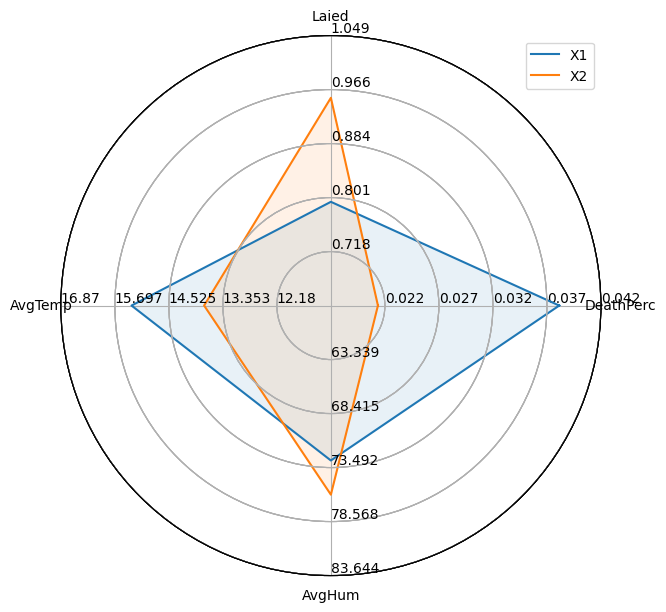

In [68]:
# example data
variables = parameters
ranges = ranges    

# plotting
fig1 = plt.figure(figsize=(6, 6))

axes = [fig1.add_axes([0.1,0.1,0.9,0.9],polar=True,
        label = "axes{}".format(i)) 
        for i in range(len(variables))]

radar5 = ComplexRadar(fig1, variables, ranges, axes)
radar5.plot(meansX1, label="X1")
radar5.fill(meansX1, alpha=0.1)

radar6 = ComplexRadar(fig1, variables, ranges, axes)
radar6.plot(meansX2, label="X2")
radar6.fill(meansX2, alpha=0.1)

axes[0].legend()

plt.show()   